# Prepare DataFrames & View

In [3]:
import pandas as pd

train_data = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

In [4]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


# Find NaN values in Features

In [5]:
columns_with_nan = [col for col in train_data.columns if train_data[col].isna().any()]
print(columns_with_nan)

# Test
columns_with_nan2 = [col for col in test_data.columns if test_data[col].isna().any()]
# columns_with_nan == columns_with_nan2 --> No unique NaNs between Datasets

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name']


# Impute & One Hot Encode the NaN containing Columns

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

After observing the feature columns containing NaN values, we strategize about optimal imputing.  

In [7]:
category_imputer = SimpleImputer(strategy='most_frequent')  
number_imputer = SimpleImputer(strategy='median')  

one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

Since we are imputing, with focus on these given feature columns, we recognize categorization and apply One Hot Encoding

In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ('HomePlanet', Pipeline(steps=[('impute', category_imputer),('encode', one_hot_encoder)]), ['HomePlanet']),
        ('CryoSleep', category_imputer, ['CryoSleep']),
        ('Cabin', category_imputer, ['Cabin']),
        ('Destination', Pipeline(steps=[('impute', category_imputer),('encode', one_hot_encoder)]), ['Destination']),
        ('Age', number_imputer, ['Age']),
        ('VIP', category_imputer, ['VIP']),
        ('RoomService', number_imputer, ['RoomService']),
        ('FoodCourt', number_imputer, ['FoodCourt']),
        ('ShoppingMall', number_imputer, ['ShoppingMall']),
        ('Spa', number_imputer, ['Spa']),
        ('VRDeck', number_imputer, ['VRDeck']),
        ('Name', category_imputer, ['Name']),
        
    ], remainder='passthrough')

transformed_traindata = preprocessor.fit_transform(train_data)

# Test
transformed_testdata = preprocessor.fit_transform(test_data)

When we execute this, the DataFrame gets lost, and turned into an array as seen blow

In [9]:
transformed_traindata

array([[0.0, 1.0, 0.0, ..., 'Maham Ofracculy', '0001_01', False],
       [1.0, 0.0, 0.0, ..., 'Juanna Vines', '0002_01', True],
       [0.0, 1.0, 0.0, ..., 'Altark Susent', '0003_01', False],
       ...,
       [1.0, 0.0, 0.0, ..., 'Fayey Connon', '9279_01', True],
       [0.0, 1.0, 0.0, ..., 'Celeon Hontichre', '9280_01', False],
       [0.0, 1.0, 0.0, ..., 'Propsh Hontichre', '9280_02', True]],
      dtype=object)

Meaning that we need to re-convert it into a Pandas DataFrame

In [10]:
correct_col_names = ['HP: Earth', 'HP: Europa', 'HP: Mars'] +  ['CryoSleep'] + ['Cabin'] + [ '55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e'] + ['Age'] + ['VIP'] + ['RoomService','Foodcourt','ShoppingMall','Spa','VRDeck'] + ['Name', 'PassengerId', 'Transported'] 

transformed_traindata = pd.DataFrame(transformed_traindata, columns=correct_col_names, index=train_data.index)

transformed_traindata

,HP: Earth,HP: Europa,HP: Mars,CryoSleep,Cabin,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Age,VIP,RoomService,Foodcourt,ShoppingMall,Spa,VRDeck,Name,PassengerId,Transported
0,0.0,1.0,0.0,False,B/0/P,0.0,0.0,1.0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0001_01,False
1,1.0,0.0,0.0,False,F/0/S,0.0,0.0,1.0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,0002_01,True
2,0.0,1.0,0.0,False,A/0/S,0.0,0.0,1.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0003_01,False
3,0.0,1.0,0.0,False,A/0/S,0.0,0.0,1.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0003_02,False
4,1.0,0.0,0.0,False,F/1/S,0.0,0.0,1.0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,0004_01,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,0.0,False,A/98/P,1.0,0.0,0.0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,9276_01,False
8689,1.0,0.0,0.0,True,G/1499/S,0.0,1.0,0.0,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,9278_01,False
8690,1.0,0.0,0.0,False,G/1500/S,0.0,0.0,1.0,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,9279_01,True
8691,0.0,1.0,0.0,False,E/608/S,1.0,0.0,0.0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,9280_01,False


Perfect, now we do the same for our testdata, notice however that the shape has a mismatch. This is because the test data does not contain the label, whereas the training data does.  
In this case our label is: "Transported", which is what we're trying to predict.

In [11]:
correct_col_names = ['HP: Earth', 'HP: Europa', 'HP: Mars'] +  ['CryoSleep'] + ['Cabin'] + [ '55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e'] + ['Age'] + ['VIP'] + ['RoomService','Foodcourt','ShoppingMall','Spa','VRDeck'] + ['Name', 'PassengerId'] 

transformed_testdata = pd.DataFrame(transformed_testdata, columns=correct_col_names, index=test_data.index)

transformed_testdata

,HP: Earth,HP: Europa,HP: Mars,CryoSleep,Cabin,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Age,VIP,RoomService,Foodcourt,ShoppingMall,Spa,VRDeck,Name,PassengerId
0,1.0,0.0,0.0,True,G/3/S,0.0,0.0,1.0,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013_01
1,1.0,0.0,0.0,False,F/4/S,0.0,0.0,1.0,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0018_01
2,0.0,1.0,0.0,True,C/0/S,1.0,0.0,0.0,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0019_01
3,0.0,1.0,0.0,False,C/1/S,0.0,0.0,1.0,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0021_01
4,1.0,0.0,0.0,False,F/5/S,0.0,0.0,1.0,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0023_01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1.0,0.0,0.0,True,G/1496/S,0.0,0.0,1.0,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,9266_02
4273,1.0,0.0,0.0,False,G/160/P,0.0,0.0,1.0,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,9269_01
4274,0.0,0.0,1.0,True,D/296/P,1.0,0.0,0.0,26.0,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,9271_01
4275,0.0,1.0,0.0,False,D/297/P,0.0,0.0,1.0,26.0,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,9273_01


As we see below, none of our feature columns have NaN values remaining.  
NaN values don't work with ML models, so solving this is a good first step.

In [12]:
columns_with_nan = [col for col in transformed_traindata.columns if transformed_traindata[col].isna().any()]
columns_with_nan

[]

# Feature Engineering

Not every feature is useful, sometimes they don't impact anything and can be deleted for the sake of efficiency. Other times the important data needs to be extracted.  
Consider the case of the Feature: Cabin for example  
"Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard."
And feel free to look up to the last DataFrame, and notice that Cabin is a string, we can't work with this, we need numbers for our models.  
We have the choice to delete Cabin, or we can extract other feature columns out of it that can perhaps still be useful.  

Let's analyze Cabin - Recognizing it contains 3 parts in its structure.

In [13]:
# Structure 1:

transformed_traindata['Deck'] = transformed_traindata['Cabin'].str.split('/').str[0].str[0]
transformed_traindata = pd.concat([transformed_traindata, pd.get_dummies(transformed_traindata['Deck'], prefix='Deck')], axis=1)
transformed_traindata.drop('Deck', axis=1, inplace=True)

# Test
transformed_testdata['Deck'] = transformed_testdata['Cabin'].str.split('/').str[0].str[0]
transformed_testdata = pd.concat([transformed_testdata, pd.get_dummies(transformed_testdata['Deck'], prefix='Deck')], axis=1)
transformed_testdata.drop('Deck', axis=1, inplace=True)

In [14]:
transformed_traindata

,HP: Earth,HP: Europa,HP: Mars,CryoSleep,Cabin,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Age,VIP,...,PassengerId,Transported,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,0.0,1.0,0.0,False,B/0/P,0.0,0.0,1.0,39.0,False,...,0001_01,False,False,True,False,False,False,False,False,False
1,1.0,0.0,0.0,False,F/0/S,0.0,0.0,1.0,24.0,False,...,0002_01,True,False,False,False,False,False,True,False,False
2,0.0,1.0,0.0,False,A/0/S,0.0,0.0,1.0,58.0,True,...,0003_01,False,True,False,False,False,False,False,False,False
3,0.0,1.0,0.0,False,A/0/S,0.0,0.0,1.0,33.0,False,...,0003_02,False,True,False,False,False,False,False,False,False
4,1.0,0.0,0.0,False,F/1/S,0.0,0.0,1.0,16.0,False,...,0004_01,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,0.0,False,A/98/P,1.0,0.0,0.0,41.0,True,...,9276_01,False,True,False,False,False,False,False,False,False
8689,1.0,0.0,0.0,True,G/1499/S,0.0,1.0,0.0,18.0,False,...,9278_01,False,False,False,False,False,False,False,True,False
8690,1.0,0.0,0.0,False,G/1500/S,0.0,0.0,1.0,26.0,False,...,9279_01,True,False,False,False,False,False,False,True,False
8691,0.0,1.0,0.0,False,E/608/S,1.0,0.0,0.0,32.0,False,...,9280_01,False,False,False,False,False,True,False,False,False


We seperated the first part, and using one hot encoding made it something that can be worked with.  
In this case, several Deck locations pinpointing where every Person their cabin was at in a way the ML Model can work with...  
Well, not quite. As you see we have many True/False booleans in our tree, our model needs it in the shape of 1/0 booleans.  
But this is a simple matter, which will be applied at the end of our Feature Engineering

For now, we focus on the second part of our 'Cabin' Feature 

In [15]:
# Extract the cabin group
transformed_traindata['Cabin_Index'] = transformed_traindata['Cabin'].str.split('/').str[0]

# Count members in each cabin group
cabin_counts = transformed_traindata['Cabin_Index'].value_counts().to_dict()
transformed_traindata['Cabin_Members'] = transformed_traindata['Cabin_Index'].map(cabin_counts)

# Test
transformed_testdata['Cabin_Index'] = transformed_testdata['Cabin'].str.split('/').str[0]
cabin_counts = transformed_testdata['Cabin_Index'].value_counts().to_dict()
transformed_testdata['Cabin_Members'] = transformed_testdata['Cabin_Index'].map(cabin_counts)


In [16]:
transformed_traindata

,HP: Earth,HP: Europa,HP: Mars,CryoSleep,Cabin,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Age,VIP,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Cabin_Index,Cabin_Members
0,0.0,1.0,0.0,False,B/0/P,0.0,0.0,1.0,39.0,False,...,False,True,False,False,False,False,False,False,B,779
1,1.0,0.0,0.0,False,F/0/S,0.0,0.0,1.0,24.0,False,...,False,False,False,False,False,True,False,False,F,2794
2,0.0,1.0,0.0,False,A/0/S,0.0,0.0,1.0,58.0,True,...,True,False,False,False,False,False,False,False,A,256
3,0.0,1.0,0.0,False,A/0/S,0.0,0.0,1.0,33.0,False,...,True,False,False,False,False,False,False,False,A,256
4,1.0,0.0,0.0,False,F/1/S,0.0,0.0,1.0,16.0,False,...,False,False,False,False,False,True,False,False,F,2794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,0.0,False,A/98/P,1.0,0.0,0.0,41.0,True,...,True,False,False,False,False,False,False,False,A,256
8689,1.0,0.0,0.0,True,G/1499/S,0.0,1.0,0.0,18.0,False,...,False,False,False,False,False,False,True,False,G,2758
8690,1.0,0.0,0.0,False,G/1500/S,0.0,0.0,1.0,26.0,False,...,False,False,False,False,False,False,True,False,G,2758
8691,0.0,1.0,0.0,False,E/608/S,1.0,0.0,0.0,32.0,False,...,False,False,False,False,True,False,False,False,E,876


Here we recognize there are but a few repeating numbers, represented in the DataFrame.  
Meaning that we can consider them categories, and one hot encode them.

In [17]:
transformed_traindata = pd.concat([
    transformed_traindata,
    pd.get_dummies(transformed_traindata['Cabin_Index'], prefix='Cabin_Group')
], axis=1)

transformed_traindata.drop('Cabin_Index', axis=1, inplace=True)

# Test
transformed_testdata = pd.concat([
    transformed_testdata,
    pd.get_dummies(transformed_testdata['Cabin_Index'], prefix='Cabin_Group')
], axis=1)

transformed_testdata.drop('Cabin_Index', axis=1, inplace=True)

In [18]:
transformed_traindata

,HP: Earth,HP: Europa,HP: Mars,CryoSleep,Cabin,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Age,VIP,...,Deck_T,Cabin_Members,Cabin_Group_A,Cabin_Group_B,Cabin_Group_C,Cabin_Group_D,Cabin_Group_E,Cabin_Group_F,Cabin_Group_G,Cabin_Group_T
0,0.0,1.0,0.0,False,B/0/P,0.0,0.0,1.0,39.0,False,...,False,779,False,True,False,False,False,False,False,False
1,1.0,0.0,0.0,False,F/0/S,0.0,0.0,1.0,24.0,False,...,False,2794,False,False,False,False,False,True,False,False
2,0.0,1.0,0.0,False,A/0/S,0.0,0.0,1.0,58.0,True,...,False,256,True,False,False,False,False,False,False,False
3,0.0,1.0,0.0,False,A/0/S,0.0,0.0,1.0,33.0,False,...,False,256,True,False,False,False,False,False,False,False
4,1.0,0.0,0.0,False,F/1/S,0.0,0.0,1.0,16.0,False,...,False,2794,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,0.0,False,A/98/P,1.0,0.0,0.0,41.0,True,...,False,256,True,False,False,False,False,False,False,False
8689,1.0,0.0,0.0,True,G/1499/S,0.0,1.0,0.0,18.0,False,...,False,2758,False,False,False,False,False,False,True,False
8690,1.0,0.0,0.0,False,G/1500/S,0.0,0.0,1.0,26.0,False,...,False,2758,False,False,False,False,False,False,True,False
8691,0.0,1.0,0.0,False,E/608/S,1.0,0.0,0.0,32.0,False,...,False,876,False,False,False,False,True,False,False,False


As you can see, we represented the few categories of Cabin_Members under the several Cabin_Groups.  
And now we focus on extracting a feature from the third part of 'Cabin'.  
This is not always neccessary, but in our case it was deemed useful.

In [19]:
# Extract the last letter and create a boolean column
transformed_traindata['Port/Star'] = transformed_traindata['Cabin'].str.split('/').str[-1]
transformed_traindata['Port/Star'] = transformed_traindata['Port/Star'].replace({'P': 1, 'S': 0})

# Test
transformed_testdata['Port/Star'] = transformed_testdata['Cabin'].str.split('/').str[-1]
transformed_testdata['Port/Star'] = transformed_testdata['Port/Star'].replace({'P': 1, 'S': 0})

/tmp/ipykernel_33/1424579545.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transformed_traindata['Port/Star'] = transformed_traindata['Port/Star'].replace({'P': 1, 'S': 0})
/tmp/ipykernel_33/1424579545.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transformed_testdata['Port/Star'] = transformed_testdata['Port/Star'].replace({'P': 1, 'S': 0})


In [20]:
transformed_traindata

,HP: Earth,HP: Europa,HP: Mars,CryoSleep,Cabin,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Age,VIP,...,Cabin_Members,Cabin_Group_A,Cabin_Group_B,Cabin_Group_C,Cabin_Group_D,Cabin_Group_E,Cabin_Group_F,Cabin_Group_G,Cabin_Group_T,Port/Star
0,0.0,1.0,0.0,False,B/0/P,0.0,0.0,1.0,39.0,False,...,779,False,True,False,False,False,False,False,False,1
1,1.0,0.0,0.0,False,F/0/S,0.0,0.0,1.0,24.0,False,...,2794,False,False,False,False,False,True,False,False,0
2,0.0,1.0,0.0,False,A/0/S,0.0,0.0,1.0,58.0,True,...,256,True,False,False,False,False,False,False,False,0
3,0.0,1.0,0.0,False,A/0/S,0.0,0.0,1.0,33.0,False,...,256,True,False,False,False,False,False,False,False,0
4,1.0,0.0,0.0,False,F/1/S,0.0,0.0,1.0,16.0,False,...,2794,False,False,False,False,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,0.0,False,A/98/P,1.0,0.0,0.0,41.0,True,...,256,True,False,False,False,False,False,False,False,1
8689,1.0,0.0,0.0,True,G/1499/S,0.0,1.0,0.0,18.0,False,...,2758,False,False,False,False,False,False,True,False,0
8690,1.0,0.0,0.0,False,G/1500/S,0.0,0.0,1.0,26.0,False,...,2758,False,False,False,False,False,False,True,False,0
8691,0.0,1.0,0.0,False,E/608/S,1.0,0.0,0.0,32.0,False,...,876,False,False,False,False,True,False,False,False,0


Perfect binary boolean conversion, however notice the inconsistency between using True/False earlier, and now 1/0.  
As i mentioned earlier, this is easily solved later

In [21]:
transformed_traindata.drop('Cabin', axis=1, inplace=True)

# Test
transformed_testdata.drop('Cabin', axis=1, inplace=True)

In [22]:
transformed_traindata

,HP: Earth,HP: Europa,HP: Mars,CryoSleep,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Age,VIP,RoomService,...,Cabin_Members,Cabin_Group_A,Cabin_Group_B,Cabin_Group_C,Cabin_Group_D,Cabin_Group_E,Cabin_Group_F,Cabin_Group_G,Cabin_Group_T,Port/Star
0,0.0,1.0,0.0,False,0.0,0.0,1.0,39.0,False,0.0,...,779,False,True,False,False,False,False,False,False,1
1,1.0,0.0,0.0,False,0.0,0.0,1.0,24.0,False,109.0,...,2794,False,False,False,False,False,True,False,False,0
2,0.0,1.0,0.0,False,0.0,0.0,1.0,58.0,True,43.0,...,256,True,False,False,False,False,False,False,False,0
3,0.0,1.0,0.0,False,0.0,0.0,1.0,33.0,False,0.0,...,256,True,False,False,False,False,False,False,False,0
4,1.0,0.0,0.0,False,0.0,0.0,1.0,16.0,False,303.0,...,2794,False,False,False,False,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,0.0,False,1.0,0.0,0.0,41.0,True,0.0,...,256,True,False,False,False,False,False,False,False,1
8689,1.0,0.0,0.0,True,0.0,1.0,0.0,18.0,False,0.0,...,2758,False,False,False,False,False,False,True,False,0
8690,1.0,0.0,0.0,False,0.0,0.0,1.0,26.0,False,0.0,...,2758,False,False,False,False,False,False,True,False,0
8691,0.0,1.0,0.0,False,1.0,0.0,0.0,32.0,False,0.0,...,876,False,False,False,False,True,False,False,False,0


So far we have taken a look at the original feature: 'Cabin'.  
And extracted 3 other features from its parts.   

Since the original Cabin feature is useless to us, and can't be used in an ML model, it will be cleaned up as seen above.

**But there are more features to engineer still...**

In [23]:
# Summing up the selected columns to create a new 'luxury_spent' column
transformed_traindata['luxury_spent'] = transformed_traindata[['RoomService', 'Foodcourt', 'ShoppingMall', 'Spa']].sum(axis=1)

# Test
transformed_testdata['luxury_spent'] = transformed_testdata[['RoomService', 'Foodcourt', 'ShoppingMall', 'Spa']].sum(axis=1)

In [24]:
transformed_traindata

,HP: Earth,HP: Europa,HP: Mars,CryoSleep,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Age,VIP,RoomService,...,Cabin_Group_A,Cabin_Group_B,Cabin_Group_C,Cabin_Group_D,Cabin_Group_E,Cabin_Group_F,Cabin_Group_G,Cabin_Group_T,Port/Star,luxury_spent
0,0.0,1.0,0.0,False,0.0,0.0,1.0,39.0,False,0.0,...,False,True,False,False,False,False,False,False,1,0.0
1,1.0,0.0,0.0,False,0.0,0.0,1.0,24.0,False,109.0,...,False,False,False,False,False,True,False,False,0,692.0
2,0.0,1.0,0.0,False,0.0,0.0,1.0,58.0,True,43.0,...,True,False,False,False,False,False,False,False,0,10334.0
3,0.0,1.0,0.0,False,0.0,0.0,1.0,33.0,False,0.0,...,True,False,False,False,False,False,False,False,0,4983.0
4,1.0,0.0,0.0,False,0.0,0.0,1.0,16.0,False,303.0,...,False,False,False,False,False,True,False,False,0,1089.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,0.0,False,1.0,0.0,0.0,41.0,True,0.0,...,True,False,False,False,False,False,False,False,1,8462.0
8689,1.0,0.0,0.0,True,0.0,1.0,0.0,18.0,False,0.0,...,False,False,False,False,False,False,True,False,0,0.0
8690,1.0,0.0,0.0,False,0.0,0.0,1.0,26.0,False,0.0,...,False,False,False,False,False,False,True,False,0,1873.0
8691,0.0,1.0,0.0,False,1.0,0.0,0.0,32.0,False,0.0,...,False,False,False,False,True,False,False,False,0,1402.0


For example, the amount of money people have spent in total might hold some patterns our ML model finds interesting.  
Represented under the new feature: luxury_spent

In [25]:
def most_spent_category(row):
    # Define the columns to check
    columns = ['RoomService', 'Foodcourt', 'ShoppingMall', 'Spa', 'VRDeck']
    # Find the column where the maximum value occurs
    max_category = row[columns].idxmax()
    # Check if all values are 0
    if row[columns].sum() == 0:
        return 'Nowhere'
    else:
        return max_category

# Apply the function to the DataFrame
transformed_traindata['Most_Spent_Category'] = transformed_traindata.apply(most_spent_category, axis=1)

# Test
transformed_testdata['Most_Spent_Category'] = transformed_testdata.apply(most_spent_category, axis=1)

In [26]:
transformed_traindata['Most_Spent_Category']

0            Nowhere
1                Spa
2                Spa
3                Spa
4                Spa
            ...     
8688       Foodcourt
8689         Nowhere
8690    ShoppingMall
8691          VRDeck
8692       Foodcourt
Name: Most_Spent_Category, Length: 8693, dtype: object

In [27]:
transformed_traindata

,HP: Earth,HP: Europa,HP: Mars,CryoSleep,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Age,VIP,RoomService,...,Cabin_Group_B,Cabin_Group_C,Cabin_Group_D,Cabin_Group_E,Cabin_Group_F,Cabin_Group_G,Cabin_Group_T,Port/Star,luxury_spent,Most_Spent_Category
0,0.0,1.0,0.0,False,0.0,0.0,1.0,39.0,False,0.0,...,True,False,False,False,False,False,False,1,0.0,Nowhere
1,1.0,0.0,0.0,False,0.0,0.0,1.0,24.0,False,109.0,...,False,False,False,False,True,False,False,0,692.0,Spa
2,0.0,1.0,0.0,False,0.0,0.0,1.0,58.0,True,43.0,...,False,False,False,False,False,False,False,0,10334.0,Spa
3,0.0,1.0,0.0,False,0.0,0.0,1.0,33.0,False,0.0,...,False,False,False,False,False,False,False,0,4983.0,Spa
4,1.0,0.0,0.0,False,0.0,0.0,1.0,16.0,False,303.0,...,False,False,False,False,True,False,False,0,1089.0,Spa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,0.0,False,1.0,0.0,0.0,41.0,True,0.0,...,False,False,False,False,False,False,False,1,8462.0,Foodcourt
8689,1.0,0.0,0.0,True,0.0,1.0,0.0,18.0,False,0.0,...,False,False,False,False,False,True,False,0,0.0,Nowhere
8690,1.0,0.0,0.0,False,0.0,0.0,1.0,26.0,False,0.0,...,False,False,False,False,False,True,False,0,1873.0,ShoppingMall
8691,0.0,1.0,0.0,False,1.0,0.0,0.0,32.0,False,0.0,...,False,False,False,True,False,False,False,0,1402.0,VRDeck


Something else interesting, could be recognizing what luxury people spent the most money in, or if they didn't spend money at all.  
This is represented in the feature: 'Most_Spent_Category'  

But as you might see, this gives us categories, meaning we need to one hot encode it to make it usable.

In [28]:
# One-hot encode the 'Most_Spent_Category' column
transformed_traindata = pd.concat([
    transformed_traindata,
    pd.get_dummies(transformed_traindata['Most_Spent_Category'], prefix='MaxTime')
], axis=1)

transformed_traindata.drop('Most_Spent_Category', axis=1, inplace=True)

# Test
transformed_testdata = pd.concat([
    transformed_testdata,
    pd.get_dummies(transformed_testdata['Most_Spent_Category'], prefix='MaxTime')
], axis=1)

transformed_testdata.drop('Most_Spent_Category', axis=1, inplace=True)

In [29]:
transformed_testdata

,HP: Earth,HP: Europa,HP: Mars,CryoSleep,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Age,VIP,RoomService,...,Cabin_Group_G,Cabin_Group_T,Port/Star,luxury_spent,MaxTime_Foodcourt,MaxTime_Nowhere,MaxTime_RoomService,MaxTime_ShoppingMall,MaxTime_Spa,MaxTime_VRDeck
0,1.0,0.0,0.0,True,0.0,0.0,1.0,27.0,False,0.0,...,True,False,0,0.0,False,True,False,False,False,False
1,1.0,0.0,0.0,False,0.0,0.0,1.0,19.0,False,0.0,...,False,False,0,2832.0,False,False,False,False,True,False
2,0.0,1.0,0.0,True,1.0,0.0,0.0,31.0,False,0.0,...,False,False,0,0.0,False,True,False,False,False,False
3,0.0,1.0,0.0,False,0.0,0.0,1.0,38.0,False,0.0,...,False,False,0,6833.0,True,False,False,False,False,False
4,1.0,0.0,0.0,False,0.0,0.0,1.0,20.0,False,10.0,...,False,False,0,645.0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1.0,0.0,0.0,True,0.0,0.0,1.0,34.0,False,0.0,...,True,False,0,0.0,False,True,False,False,False,False
4273,1.0,0.0,0.0,False,0.0,0.0,1.0,42.0,False,0.0,...,True,False,1,874.0,True,False,False,False,False,False
4274,0.0,0.0,1.0,True,1.0,0.0,0.0,26.0,False,0.0,...,False,False,1,0.0,False,True,False,False,False,False
4275,0.0,1.0,0.0,False,0.0,0.0,1.0,26.0,False,0.0,...,False,False,1,2680.0,True,False,False,False,False,False


As visualized, we have one hot encoded the categories, and removed the feature we engineered initially to replace it with ones compatible with our model.

In [30]:
transformed_traindata['Name']

0         Maham Ofracculy
1            Juanna Vines
2           Altark Susent
3            Solam Susent
4       Willy Santantines
              ...        
8688    Gravior Noxnuther
8689      Kurta Mondalley
8690         Fayey Connon
8691     Celeon Hontichre
8692     Propsh Hontichre
Name: Name, Length: 8693, dtype: object

Sometimes to engineer features, we need to inspect our featureset.  
In this case, the Name feature is incompatible due to it's nature of being a string.  
However, i ask myself if there is a way to extract useful data here instead of dropping the column...

And indeed there is, notice in the output that there are repeating last names. Meaning that we can engineer a feature around family.  
Perhaps it's useful information to know who came with, or without family. A boolean, and this is compatible.

In [31]:
# Step 1: Extract last names by splitting the 'Name' column
transformed_traindata['LastName'] = transformed_traindata['Name'].str.split().str[-1]

# Step 2: Count how many times each last name appears
lastname_counts = transformed_traindata['LastName'].value_counts()

# Step 3: Map these counts back to the passengers, setting to 1 if count > 1, else 0
transformed_traindata['Shared_LastName'] = transformed_traindata['LastName'].map(lastname_counts).apply(lambda x: 1 if x > 1 else 0)

transformed_traindata.drop('LastName', axis=1, inplace=True)
transformed_traindata.drop('Name', axis=1, inplace=True)

# Test
transformed_testdata['LastName'] = transformed_testdata['Name'].str.split().str[-1]

lastname_counts = transformed_testdata['LastName'].value_counts()

transformed_testdata['Shared_LastName'] = transformed_testdata['LastName'].map(lastname_counts).apply(lambda x: 1 if x > 1 else 0)

transformed_testdata.drop('LastName', axis=1, inplace=True)
transformed_testdata.drop('Name', axis=1, inplace=True)

In [32]:
transformed_traindata

,HP: Earth,HP: Europa,HP: Mars,CryoSleep,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Age,VIP,RoomService,...,Cabin_Group_T,Port/Star,luxury_spent,MaxTime_Foodcourt,MaxTime_Nowhere,MaxTime_RoomService,MaxTime_ShoppingMall,MaxTime_Spa,MaxTime_VRDeck,Shared_LastName
0,0.0,1.0,0.0,False,0.0,0.0,1.0,39.0,False,0.0,...,False,1,0.0,False,True,False,False,False,False,0
1,1.0,0.0,0.0,False,0.0,0.0,1.0,24.0,False,109.0,...,False,0,692.0,False,False,False,False,True,False,1
2,0.0,1.0,0.0,False,0.0,0.0,1.0,58.0,True,43.0,...,False,0,10334.0,False,False,False,False,True,False,1
3,0.0,1.0,0.0,False,0.0,0.0,1.0,33.0,False,0.0,...,False,0,4983.0,False,False,False,False,True,False,1
4,1.0,0.0,0.0,False,0.0,0.0,1.0,16.0,False,303.0,...,False,0,1089.0,False,False,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,0.0,False,1.0,0.0,0.0,41.0,True,0.0,...,False,1,8462.0,True,False,False,False,False,False,1
8689,1.0,0.0,0.0,True,0.0,1.0,0.0,18.0,False,0.0,...,False,0,0.0,False,True,False,False,False,False,1
8690,1.0,0.0,0.0,False,0.0,0.0,1.0,26.0,False,0.0,...,False,0,1873.0,False,False,False,True,False,False,1
8691,0.0,1.0,0.0,False,1.0,0.0,0.0,32.0,False,0.0,...,False,0,1402.0,False,False,False,False,False,True,1


As observed our newly engineered feature fits in perfectly. 
This, while dropping the features we made along the way to get us there, the ones incompatible.  
Including the original feature we derived this from, called 'Name'.

In [33]:
transformed_traindata['PassengerId']

0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 8693, dtype: object

Once again, i look at my dataset and look for troublesome feature columns. Ones my model cannot use, or ones i could derive better information from through feature engineering.  
In this case we observe PassengerId, and following the definition...

"PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always."

I have decided to split it into 2 workable features, the 'gggg' part and 'pp' part.

In [34]:
transformed_traindata[['GroupID', 'InGroupID']] = transformed_traindata['PassengerId'].str.split('_', expand=True)
transformed_traindata.drop('PassengerId', axis=1, inplace=True)

# Test
transformed_testdata[['GroupID', 'InGroupID']] = transformed_testdata['PassengerId'].str.split('_', expand=True)
transformed_testdata.drop('PassengerId', axis=1, inplace=True)

In [35]:
transformed_traindata

,HP: Earth,HP: Europa,HP: Mars,CryoSleep,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Age,VIP,RoomService,...,luxury_spent,MaxTime_Foodcourt,MaxTime_Nowhere,MaxTime_RoomService,MaxTime_ShoppingMall,MaxTime_Spa,MaxTime_VRDeck,Shared_LastName,GroupID,InGroupID
0,0.0,1.0,0.0,False,0.0,0.0,1.0,39.0,False,0.0,...,0.0,False,True,False,False,False,False,0,0001,01
1,1.0,0.0,0.0,False,0.0,0.0,1.0,24.0,False,109.0,...,692.0,False,False,False,False,True,False,1,0002,01
2,0.0,1.0,0.0,False,0.0,0.0,1.0,58.0,True,43.0,...,10334.0,False,False,False,False,True,False,1,0003,01
3,0.0,1.0,0.0,False,0.0,0.0,1.0,33.0,False,0.0,...,4983.0,False,False,False,False,True,False,1,0003,02
4,1.0,0.0,0.0,False,0.0,0.0,1.0,16.0,False,303.0,...,1089.0,False,False,False,False,True,False,1,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,0.0,False,1.0,0.0,0.0,41.0,True,0.0,...,8462.0,True,False,False,False,False,False,1,9276,01
8689,1.0,0.0,0.0,True,0.0,1.0,0.0,18.0,False,0.0,...,0.0,False,True,False,False,False,False,1,9278,01
8690,1.0,0.0,0.0,False,0.0,0.0,1.0,26.0,False,0.0,...,1873.0,False,False,False,True,False,False,1,9279,01
8691,0.0,1.0,0.0,False,1.0,0.0,0.0,32.0,False,0.0,...,1402.0,False,False,False,False,False,True,1,9280,01


Which is quickly done, our original feature dropped and once again our successful conversion is visualized.

So far so good, everything is either in boolean form or number form. This is something our model can use.  
Now we just need to convert our True/False booleans to 1/0 Booleans.

In [36]:
transformed_traindata = transformed_traindata.replace({True: 1, False: 0})

# Test
transformed_testdata = transformed_testdata.replace({True: 1, False: 0})

/tmp/ipykernel_33/3649280060.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transformed_traindata = transformed_traindata.replace({True: 1, False: 0})
/tmp/ipykernel_33/3649280060.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transformed_testdata = transformed_testdata.replace({True: 1, False: 0})


In [37]:
transformed_traindata

,HP: Earth,HP: Europa,HP: Mars,CryoSleep,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Age,VIP,RoomService,...,luxury_spent,MaxTime_Foodcourt,MaxTime_Nowhere,MaxTime_RoomService,MaxTime_ShoppingMall,MaxTime_Spa,MaxTime_VRDeck,Shared_LastName,GroupID,InGroupID
0,0.0,1.0,0.0,0,0.0,0.0,1.0,39.0,0,0.0,...,0.0,0,1,0,0,0,0,0,0001,01
1,1.0,0.0,0.0,0,0.0,0.0,1.0,24.0,0,109.0,...,692.0,0,0,0,0,1,0,1,0002,01
2,0.0,1.0,0.0,0,0.0,0.0,1.0,58.0,1,43.0,...,10334.0,0,0,0,0,1,0,1,0003,01
3,0.0,1.0,0.0,0,0.0,0.0,1.0,33.0,0,0.0,...,4983.0,0,0,0,0,1,0,1,0003,02
4,1.0,0.0,0.0,0,0.0,0.0,1.0,16.0,0,303.0,...,1089.0,0,0,0,0,1,0,1,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,0.0,0,1.0,0.0,0.0,41.0,1,0.0,...,8462.0,1,0,0,0,0,0,1,9276,01
8689,1.0,0.0,0.0,1,0.0,1.0,0.0,18.0,0,0.0,...,0.0,0,1,0,0,0,0,1,9278,01
8690,1.0,0.0,0.0,0,0.0,0.0,1.0,26.0,0,0.0,...,1873.0,0,0,0,1,0,0,1,9279,01
8691,0.0,1.0,0.0,0,1.0,0.0,0.0,32.0,0,0.0,...,1402.0,0,0,0,0,0,1,1,9280,01


Now our dataset is perfect, and ready to be used.  
Let's seperate the label next and create a proper X (Feature dataset) and y (label)

In [38]:
y = transformed_traindata['Transported']
transformed_traindata.drop('Transported', axis=1, inplace=True)
X = transformed_traindata

Oh and-  
As we have noticed, with more features, we lost detail because of the default compact nature of the DataFrame visual.  
However we can change that, let's do it, and take a good last look at our clean and ready to use Dataset.  
As you can see everything is using numbers...

In [39]:
# Set option to display all columns (use a large number if unsure of total columns)
pd.set_option('display.max_columns', None)

# Now when you view the DataFrame, all columns will be shown
transformed_traindata

,HP: Earth,HP: Europa,HP: Mars,CryoSleep,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Age,VIP,RoomService,Foodcourt,ShoppingMall,Spa,VRDeck,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Cabin_Members,Cabin_Group_A,Cabin_Group_B,Cabin_Group_C,Cabin_Group_D,Cabin_Group_E,Cabin_Group_F,Cabin_Group_G,Cabin_Group_T,Port/Star,luxury_spent,MaxTime_Foodcourt,MaxTime_Nowhere,MaxTime_RoomService,MaxTime_ShoppingMall,MaxTime_Spa,MaxTime_VRDeck,Shared_LastName,GroupID,InGroupID
0,0.0,1.0,0.0,0,0.0,0.0,1.0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,779,0,1,0,0,0,0,0,0,1,0.0,0,1,0,0,0,0,0,0001,01
1,1.0,0.0,0.0,0,0.0,0.0,1.0,24.0,0,109.0,9.0,25.0,549.0,44.0,0,0,0,0,0,1,0,0,2794,0,0,0,0,0,1,0,0,0,692.0,0,0,0,0,1,0,1,0002,01
2,0.0,1.0,0.0,0,0.0,0.0,1.0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,1,0,0,0,0,0,0,0,256,1,0,0,0,0,0,0,0,0,10334.0,0,0,0,0,1,0,1,0003,01
3,0.0,1.0,0.0,0,0.0,0.0,1.0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,1,0,0,0,0,0,0,0,256,1,0,0,0,0,0,0,0,0,4983.0,0,0,0,0,1,0,1,0003,02
4,1.0,0.0,0.0,0,0.0,0.0,1.0,16.0,0,303.0,70.0,151.0,565.0,2.0,0,0,0,0,0,1,0,0,2794,0,0,0,0,0,1,0,0,0,1089.0,0,0,0,0,1,0,1,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,0.0,0,1.0,0.0,0.0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,1,0,0,0,0,0,0,0,256,1,0,0,0,0,0,0,0,1,8462.0,1,0,0,0,0,0,1,9276,01
8689,1.0,0.0,0.0,1,0.0,1.0,0.0,18.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,2758,0,0,0,0,0,0,1,0,0,0.0,0,1,0,0,0,0,1,9278,01
8690,1.0,0.0,0.0,0,0.0,0.0,1.0,26.0,0,0.0,0.0,1872.0,1.0,0.0,0,0,0,0,0,0,1,0,2758,0,0,0,0,0,0,1,0,0,1873.0,0,0,0,1,0,0,1,9279,01
8691,0.0,1.0,0.0,0,1.0,0.0,0.0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,0,0,0,1,0,0,0,876,0,0,0,0,1,0,0,0,0,1402.0,0,0,0,0,0,1,1,9280,01


# Time for Machine Learning 
Now that our Data is ready, it's time to build a model.
This is a classification challenge, so i will use RandomForestClassifier.

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We can create our own train and test splits. But using GridSearch, we can explore the parameter space while at the same time having cross validation integrated.  
Meaning that manual splits are not neccessary.

# OPTIONAL: Run to find best Parameters

In [ ]:
# Exploring Hyperparam space using GridSearch

from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [200, 250],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

y_pred = grid_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.2f}")

Best parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best score: 0.8065875696279784
Test set accuracy: 0.79

# Creating our Model
We apply our parameters either by intuition, experimentation or the last cell above.

In [41]:
from sklearn.ensemble import RandomForestClassifier

final_model = RandomForestClassifier(bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators= 250, max_features='log2')
final_model.fit(X, y)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=250)

# Predicting with our Model
We apply our model on our preprocessed test dataset.  
This gives us an array with 1's and 0's predicting 'Transported' being True or False per person 

In [42]:
predictions = final_model.predict(transformed_testdata)
predictions

array([1, 0, 1, ..., 1, 1, 1])

# Preparing our Results  
Converts our array into a DataFrame, and converts 1/0 Booleans back to True/False booleans per instructions of the competition.

In [43]:
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Transported': predictions
})
submission

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,1
4275,9273_01,1


In [44]:
submission = submission.replace({1: True, 0: False})
submission

/tmp/ipykernel_33/3809171364.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  submission = submission.replace({1: True, 0: False})


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


# Creating a Submission

In [ ]:

submission.to_csv('submission.csv', index=False)


# Visualization

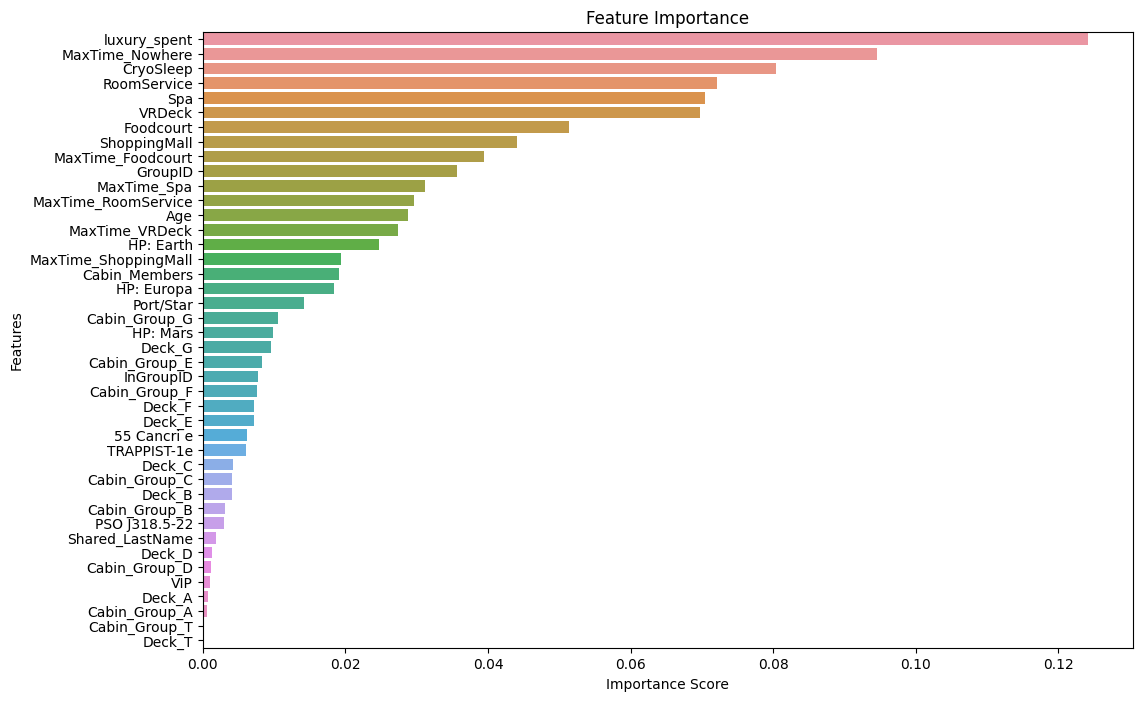

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = final_model.feature_importances_
feature_names = X.columns

importances = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=importances.index)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

Here we can see what features were deemed most important.  
Lets inspect one of them.

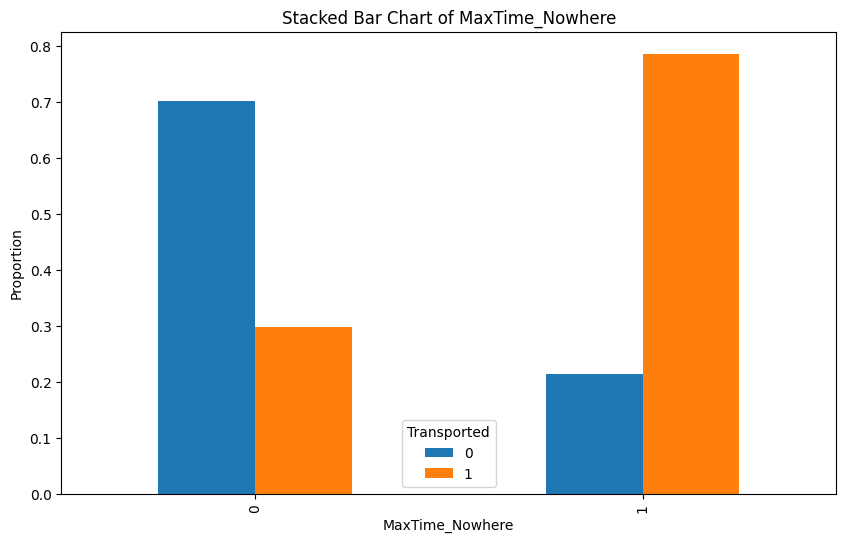

In [59]:
categorical_features = ['MaxTime_Nowhere']

for feature in categorical_features:
    cross_tab = pd.crosstab(index=X[feature], columns=y, normalize='index')
    cross_tab.plot(kind='bar', stacked=False, figsize=(10, 6))
    plt.title(f'Stacked Bar Chart of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Proportion')
    plt.legend(title='Transported')
    plt.show()


When we look at the bar chart above. We notice that nearly 80% of people that did not spend anywhere ended up being transported.  
On the other hand, of the people that did spend at one of the luxurious places, only 30% ended up being transported.

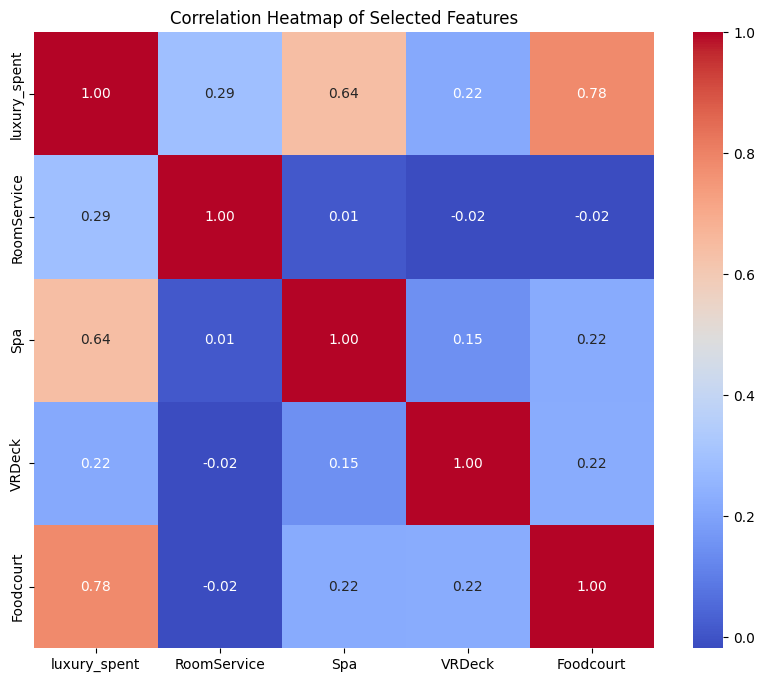

In [60]:
correlation_features = ['luxury_spent', 'RoomService', 'Spa', 'VRDeck', 'Foodcourt']
corr_matrix = X[correlation_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Features')
plt.show()


This heatmap shows correlations between features we're investigating.  
In this case we notice for example that there is a strong positive correlation between people spending a lot and the foodcourt.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

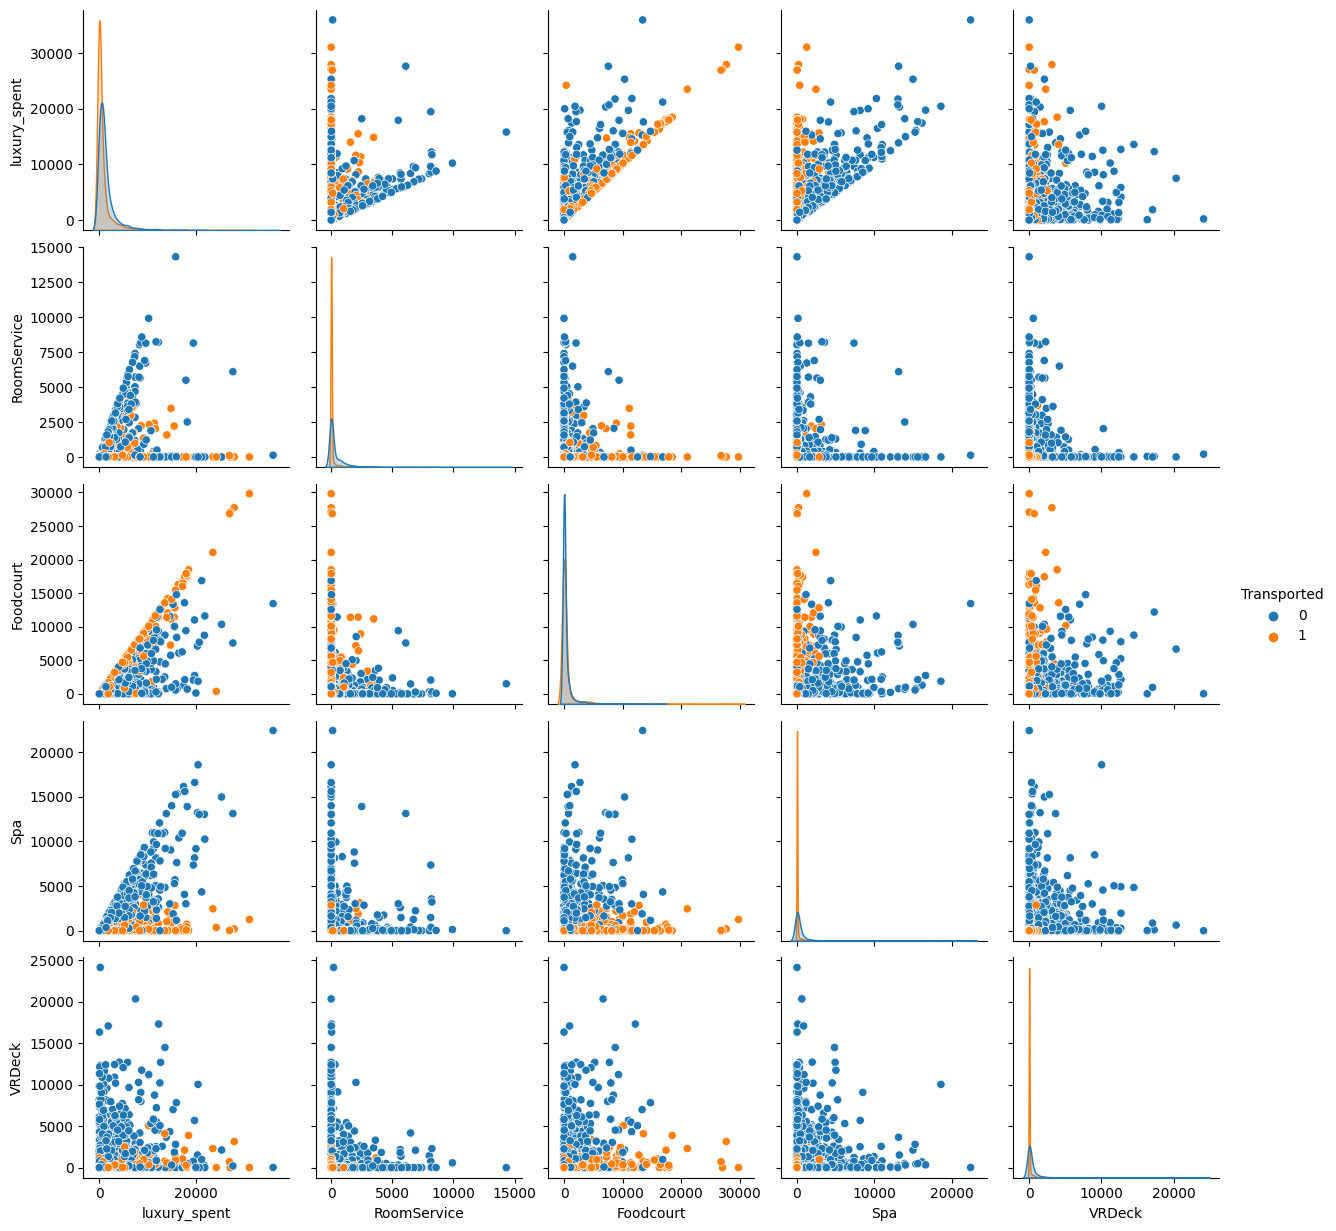

In [61]:
subset_features = ['luxury_spent', 'RoomService', 'Foodcourt', 'Spa', 'VRDeck']

sns.pairplot(X[subset_features].join(y), hue='Transported')
plt.show()

# ~